<a href="https://colab.research.google.com/github/elangbijak4/LLM-SLM-Examples/blob/main/Prediksi_Time_Series_TSMIXER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install pytorch-tsmixer

In [7]:
from torchtsmixer import TSMixer
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
model = TSMixer(sequence_length=10, prediction_length=5, input_channels=2, output_channels=4)

# Example input data
x = torch.randn(3, 10, 2)

# Forward pass
y = model(x)

# Example training loop
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dummy target for training
target = torch.randn(3, 5, 4)

# Training step
optimizer.zero_grad()
output = model(x)
loss = criterion(output, target)
loss.backward()
optimizer.step()

In [8]:
from torchtsmixer import TSMixerExt
import torch

model_ext = TSMixerExt(
    sequence_length=10,
    prediction_length=5,
    input_channels=2,
    extra_channels=3,
    hidden_channels=8,
    static_channels=4,
    output_channels=4
)

x_hist = torch.randn(3, 10, 2, requires_grad=True)
x_extra_hist = torch.randn(3, 10, 3, requires_grad=True)
x_extra_future = torch.randn(3, 5, 3, requires_grad=True)
x_static = torch.randn(3, 4, requires_grad=True)

y = model_ext.forward(
    x_hist=x_hist,
    x_extra_hist=x_extra_hist,
    x_extra_future=x_extra_future,
    x_static=x_static
)

Epoch 1/10, Loss: 1.0522507429122925
Epoch 2/10, Loss: 0.8801009058952332
Epoch 3/10, Loss: 0.7418819069862366
Epoch 4/10, Loss: 0.6082189679145813
Epoch 5/10, Loss: 0.5206711292266846
Epoch 6/10, Loss: 0.41020065546035767
Epoch 7/10, Loss: 0.3393363356590271
Epoch 8/10, Loss: 0.2783469259738922
Epoch 9/10, Loss: 0.21731385588645935
Epoch 10/10, Loss: 0.17466974258422852


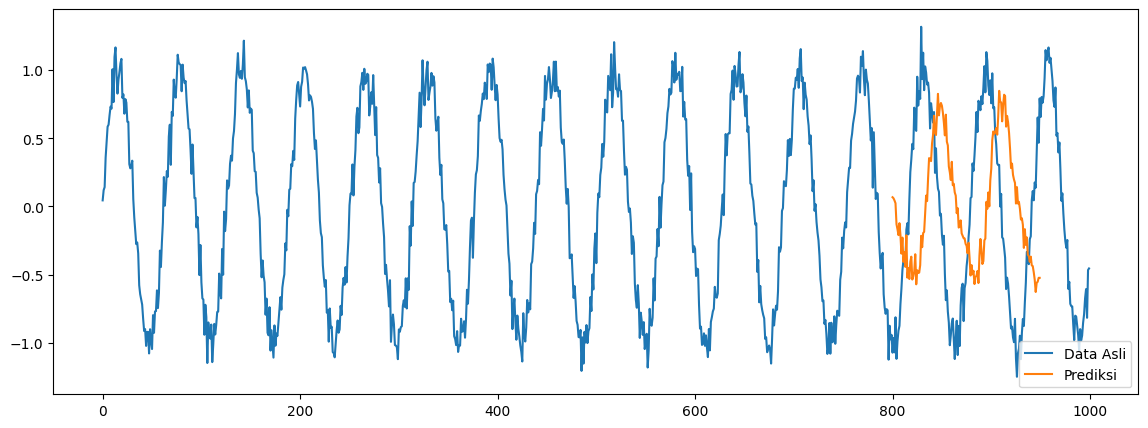

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchtsmixer import TSMixer

# Contoh data time-series: Sine wave dengan noise
time_steps = np.linspace(0, 100, 1000)
data = np.sin(time_steps) + np.random.normal(0, 0.1, time_steps.shape)

# Membagi data menjadi train dan test
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Membentuk input dan output sequences untuk pelatihan
def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 50
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Mengubah data menjadi tensor
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Bentuk input agar sesuai dengan persyaratan model
X_train = X_train.unsqueeze(-1)
X_test = X_test.unsqueeze(-1)

# Inisialisasi model TSMixer
model = TSMixer(sequence_length=sequence_length, prediction_length=1, input_channels=1, output_channels=1)

# Definisikan loss function dan optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# Evaluasi model pada data test
model.eval()
with torch.no_grad():
    predictions = model(X_test).squeeze().numpy()

# Menampilkan hasil prediksi
plt.figure(figsize=(14, 5))
plt.plot(range(len(data)), data, label='Data Asli')
plt.plot(range(train_size, train_size + len(predictions)), predictions, label='Prediksi')
plt.legend()
plt.show()